# Regression Line

In [28]:
%matplotlib inline
import numpy as np # linear algebra 
import pandas as pd # processing data in CSV file I/O (eg. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0) # to assign the figure size

#Reading Data
data = pd.read_csv('/Users/tejsharma/Downloads/headbrain.csv')
#print(data.shape)  # return the shape of DataFrame or numpy array
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
print("Data info: \n") #\n prints the new line after printing this line
print(data.info())

Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [15]:
print("Checking for any null values: \n")
print(data.isnull().any())

Checking for any null values: 

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool


In [16]:
print('Checking for any unique values in each column: \n')
print(data.nunique())

Checking for any unique values in each column: 

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64


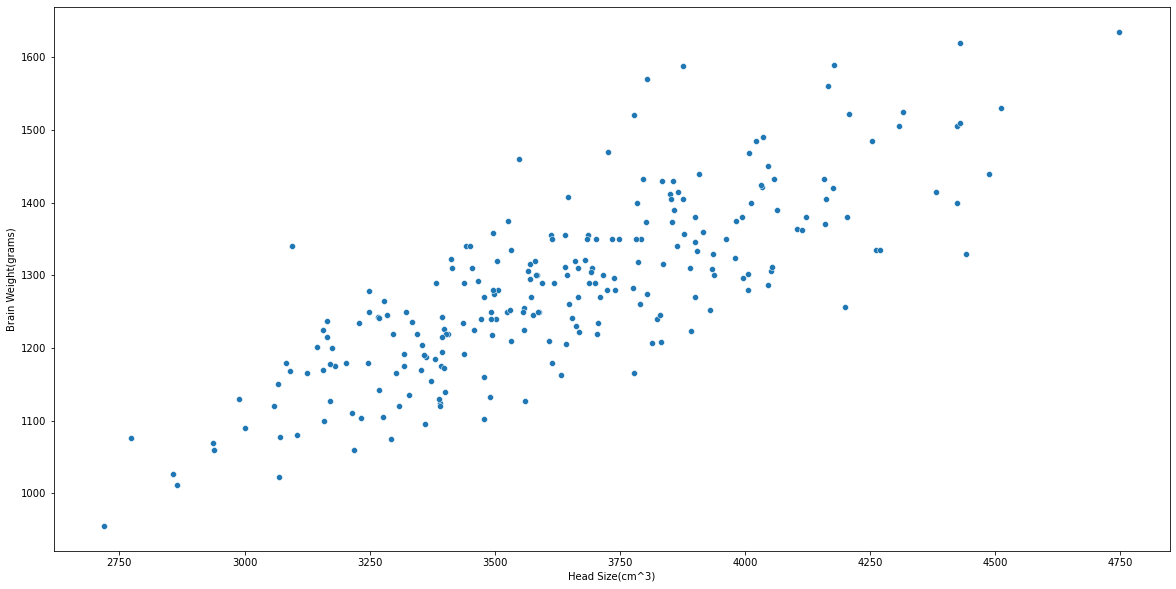

In [29]:
# Lets import the other module/libraries necessary for machine learning 
from sklearn.metrics import classification_report #used to generate detailed classification reports for classification model performance 
from sklearn.model_selection import train_test_split #used to split the data into training and testing dataset
from sklearn.linear_model import LinearRegression  # module whihc is used to create a LR model for continious values
from sklearn.metrics import r2_score  # computes coefficient of determinitation (R-squared)



# Let's plot the scattered plot between head-size and brain weight
sns.scatterplot(y = 'Brain Weight(grams)', x = 'Head Size(cm^3)', data = data)
plt.show()
                

We are focusing only Headsize (independent) and Brainsize (dependent) for this exercise so let's get in X and Y

In [35]:
data = data.values
X = data[:,2]
Y = data[:,3]
X.shape,  Y.shape

((237,), (237,))

Linear Regression model is used to predict the realtionshipe between dependent variable (target) and the independent variable(s). It can be used to check the correlations between the variables.

a. Simple Linear Regression -> relationship between just two variables (a dependent Vs an independent)
b. Multiple Regression -> relationship between two or more variables ( a dependent Vs 2 or more independent)
The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

The formula goes like this -

y = mx+c

Where ,

c - is the y-intercept

m - is the slope / coefficient -> this quantity effects the values of y

In our example -

BrainWeight = m * HeadSize + constant

constant = BrainWeight - (m * HeadSize)

In [46]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)  # Calculating mean of independent variable
    mean_y = np.mean(Y)  # Calculating mean of dependent variable

    n = len(X)     # Total number of dat points 
    numerator= 0  # initilize values as zero befor loop starts
    denominator=0  # used to sumup value within the loop
    for i in range(n):   # Calculate the coefficients of the linear regression equation (m and c)
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator #Slope of the line
    c = mean_y - m * mean_x    #Intercept of the line 
    
    return(m,c) # Return the slope(m) and intercept (c) of the linear equation

def predict(X,m,c):  # Takes the calculated slope m and intercept c, and predicts the dependent variable Y for each value of X provided.
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y) # Return the predicted value of Y for the given X- values

Now let's calculate the R-Square value (Coefficient of determination)

y_obs -> observed data

y_pred -> predicted value of y from the formula (y=mx+c)

y_hat -> mean of y_obs

total_sum_of_squares(ss_tot) -> sum( (y_obs - y_hat) ** 2 )

sum_of_squares(ss_res) -> sum( (y_obs - y_pred) ** 2 )

r2 -> 1 - total_sum_of_squares/sum_of_squares

In [47]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)  # Mean of y_obs
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

# Now calculate the Linear Regression and plot the data points 

slope =  0.2641965074330401
intercept =  316.8473727991453
R-squared : 0.6341433394669539


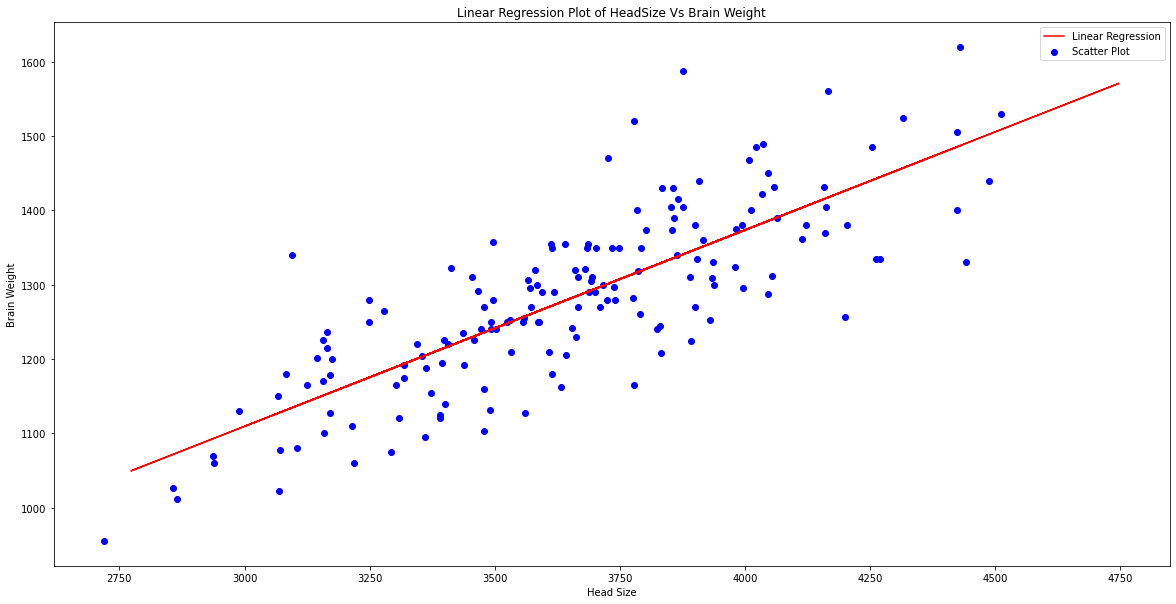

In [48]:
plt.title("LRegression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()


In [49]:
#Reshape the input data into 2D array
X = X.reshape(len(X),1) # This is typically done when working with a single feature (X) to make it compatible
#with scikit-learn's expectations, where the input features should be a 2D array.

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3) # Split the Data into Training and Testing Sets:

reg = LinearRegression() # Create and fit the linear regression model
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test) # The trained model is used to predict the dependent variable y for the testing data X_test.

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.6726985877729703
